In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [4]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<b>Note:</b> 25th percentile is 5 dollars, 50th percentile is 22 dollars and 75th percentile is 77 dollars but max is 25691 dollars which shows an irregular growth in values. But since mean is 88 dollars that says majority of the datapoints are less than 100 dollars but we do have outliers which need to be accounted while building model.

In [13]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

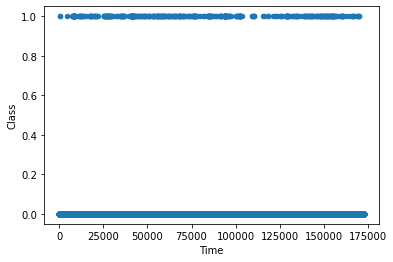

In [14]:
data.plot(x='Time', y='Class', kind='scatter')
plt.show()

In [15]:
correlation = data['Time'].corr(data['Class'])
print(correlation)

-0.012322570929245826


<b>Note: </b>Since, Time variable is not so important in model building we will eradicate that column.

In [19]:
data = data.drop("Time", axis=1)

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
legit = data[data["Class"] == 0]
legit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
fraud = data[data["Class"] == 1]
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [47]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

<b>Note: </b>Relatively less amount of transaction is seen in case of fraudulent cases as compared with legitimate transactions

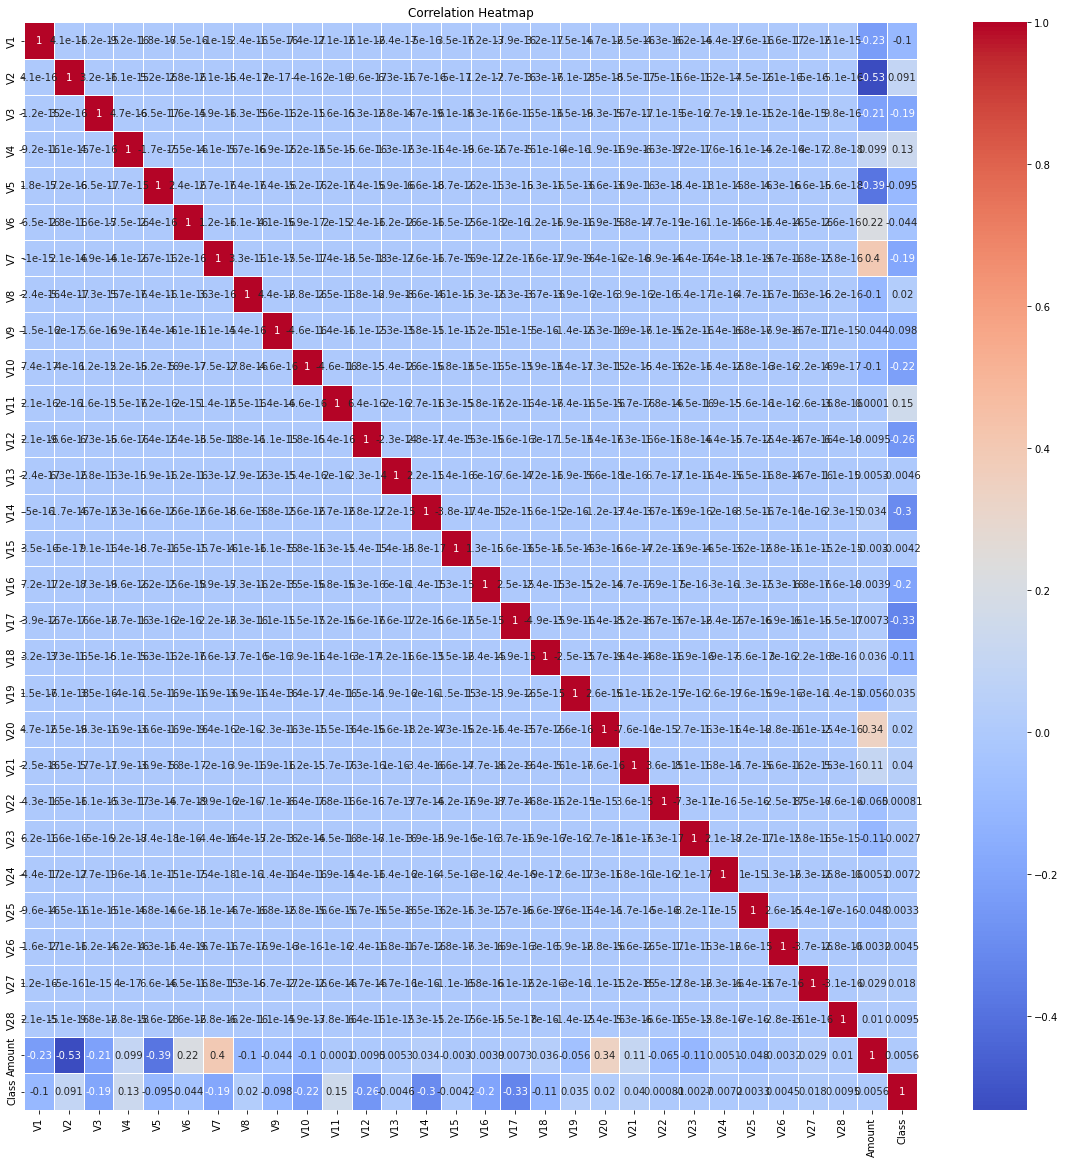

In [52]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [76]:
isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isf.fit(X)
y_isf_pred = isf.predict(X)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [95]:
y_isf_pred[y_isf_pred == 1] = 0
y_isf_pred[y_isf_pred == -1] = 1
y_isf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
n_errors = (y_isf_pred != y).sum()
print("{}: {}".format("Isolation Factor, no. of errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y,y_isf_pred))
print("Classification Report :")
print(classification_report(y,y_isf_pred))

Isolation Factor, no. of errors: 2759
Accuracy Score :
0.990312738099836
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



In [81]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof.fit(X)
y_lof_pred = lof.fit_predict(X)

In [98]:
y_lof_pred[y_lof_pred == 1] = 0
y_lof_pred[y_lof_pred == -1] = 1
y_lof_pred

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
n_errors = (y_lof_pred != y).sum()
print("{}: {}".format("Local Outlier Factor, no. of errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y,y_lof_pred))
print("Classification Report :")
print(classification_report(y,y_lof_pred))

Local Outlier Factor, no. of errors: 3109
Accuracy Score :
0.9890838357203299
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.04      0.24      0.07       492

    accuracy                           0.99    284807
   macro avg       0.52      0.61      0.53    284807
weighted avg       1.00      0.99      0.99    284807



In [109]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.05)
ocsvm.fit(X)
y_pred = ocsvm.predict(X)
y_pred

array([ 1,  1, -1, ...,  1,  1,  1], dtype=int64)

In [111]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [112]:
n_errors = (y_pred != y).sum()
print("{}: {}".format("OneClass SVM, no. of errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))

OneClass SVM, no. of errors: 13924
Accuracy Score :
0.9511107521935908
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.01      0.40      0.03       492

    accuracy                           0.95    284807
   macro avg       0.51      0.68      0.50    284807
weighted avg       1.00      0.95      0.97    284807



Conclusion : <b>Isolation Forest</b> algorithm has the highest accuracy score of <b>99.03%</b> as against to LOF with accuracy score of 98.9% and OneClass SVM with accuracy score of 95.11% 